d. Write a program and show how the exact number of rolls changes as k increases. If you have used a closed form solution for (c) then check if it matches your plot.

In [6]:
import itertools
import matplotlib.pyplot as plt

In [7]:
def p(i, k):
    if i == 1 or i == k:
        return 1 / (2**(k - 1))
    return 1 / (2**(i - 1))

In [8]:
def expected_rolls(probabilities):
    k = len(probabilities)
    expected_value = 1

    for s in range(1, k):
        sum_term = 0
        for comb in itertools.permutations(range(k), s):
            prob_comb = 1
            for idx in comb:
                prob_comb *= probabilities[idx]
            remaining_prob = 1
            term = 1
            for idx in comb:
                term -= probabilities[idx]
                remaining_prob *= term
            sum_term += prob_comb / remaining_prob    
        expected_value += sum_term
    
    return expected_value

Here, we test our c part according to our code and notice that our answer matches to the calculated answer.

In [9]:
k = 3
probabilities = [p(i, k) for i in range(1, k + 1)]
print(f"The expected number of rolls is {expected_rolls(probabilities)}")

The expected number of rolls is 6.333333333333332


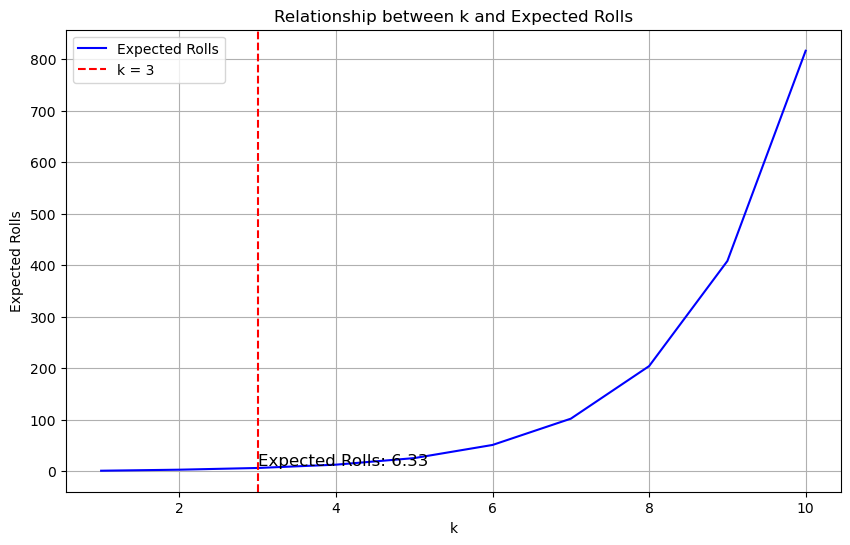

In [10]:
k_values = list(range(1, 11))
expected_values = []

# Rolling a k faced unbiased die
for k in k_values:
    probabilities = [p(i, k) for i in range(1, k + 1)]
    expected_values.append(expected_rolls(probabilities))

plt.figure(figsize=(10, 6))
plt.plot(k_values, expected_values, label='Expected Rolls', color='b')

k3_value = expected_values[2]  

plt.axvline(x=3, color='r', linestyle='--', label='k = 3')
plt.text(3, k3_value, f"Expected Rolls: {k3_value:.2f}", color='black', fontsize=12, verticalalignment='bottom')
plt.xlabel('k')
plt.ylabel('Expected Rolls')
plt.title('Relationship between k and Expected Rolls')


plt.legend()
plt.grid(True)
plt.savefig('./plots/expected.png')
plt.show()